# Sampling with Bayeux

This tutorial demonstrates how to use the `bayeux-ml` package with models defined with HSSM.

## Install `bayeux-ml` with pip

We assume that you already have HSSM installed in a virtual environment. If you have not, please follow [this tutorial](https://lnccbrown.github.io/HSSM/getting_started/installation/) to install HSSM.

In the virtual environment where HSSM is installed, you need to install `bayeux-ml` exactly as follows:

```sh
pip install hssm bayeux-ml flowMC==0.3.4 jax[cuda12]==0.4.38 jaxlib==0.4.38
```

Bayeux has some conflicts with some dependencies because it has not been updated for a while. You might also need to install other packages that it depends on for samplers, such as `blackjax`.

In [ ]:
# Un-comment and run this only on Google Colab
# !pip install hssm bayeux-ml flowMC==0.3.4 jax[cuda12]==0.4.38 jaxlib==0.4.38

In [ ]:
import arviz as az
import bayeux as bx
import jax
import hssm

## Step 1. Build the model with HSSM

You can build a model with HSSM as usual. No special steps required. Below is an example:

In [ ]:
# Load a package-supplied dataset
cav_data = hssm.load_data("cavanagh_theta")

# Define a basic hierarchical model with trial-level covariates
model = hssm.HSSM(
    model="ddm",
    data=cav_data,
    include=[
        {
            "name": "v",
            "prior": {
                "Intercept": {"name": "Normal", "mu": 0.0, "sigma": 0.1},
                "theta": {"name": "Normal", "mu": 0.0, "sigma": 0.1},
            },
            "formula": "v ~ theta + (1|participant_id)",
            "link": "identity",
        },
    ],
)

No common intercept. Bounds for parameter v is not applied due to a current limitation of Bambi. This will change in the future.


Model initialized successfully.


INFO:hssm:Model initialized successfully.


## Step 2. Sample with Bayeux

`Bayeux` is compatible with any PyMC model through `bx.Model.from_pymc()`, which you can access via `model.pymc_model` from the HSSM object you have constructed.

The example below samples with the `numpyro_nuts` sampler that `bayeux` provides.

In [ ]:
bx_model = bx.Model.from_pymc(model.pymc_model)
idata = bx_model.mcmc.numpyro_nuts(seed=jax.random.key(0))

sample: 100%|██████████| 1500/1500 [05:59<00:00,  4.18it/s]


## Step 3. Plot trace with inference data

The object returned from the sampling process is an `InferenceData` object, just as HSSM does. You can use `ArviZ` to inspect it:

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'v_1|participant_id_mu'}>,
        <Axes: title={'center': 'v_1|participant_id_mu'}>],
       [<Axes: title={'center': 'v_1|participant_id_offset'}>,
        <Axes: title={'center': 'v_1|participant_id_offset'}>],
       [<Axes: title={'center': 'v_1|participant_id_sigma'}>,
        <Axes: title={'center': 'v_1|participant_id_sigma'}>],
       [<Axes: title={'center': 'v_Intercept'}>,
        <Axes: title={'center': 'v_Intercept'}>],
       [<Axes: title={'center': 'v_theta'}>,
        <Axes: title={'center': 'v_theta'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

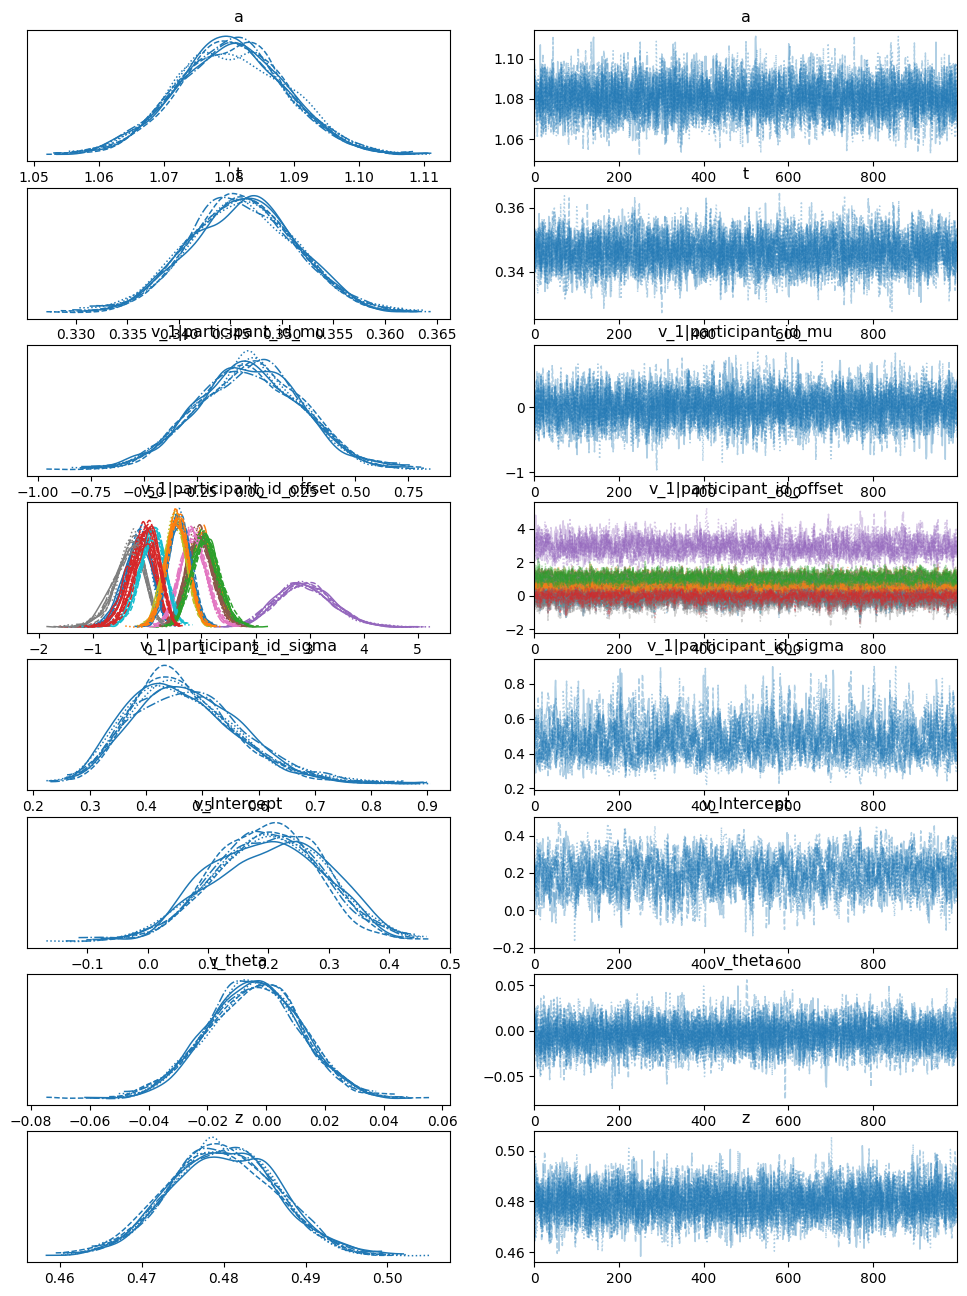

In [ ]:
az.plot_trace(idata)

You can also use any other sampler provided via `bayeux`:

In [ ]:
idata = bx_model.mcmc.tfp_nuts(seed=jax.random.key(0))

array([[<Axes: title={'center': 'a'}>, <Axes: title={'center': 'a'}>],
       [<Axes: title={'center': 't'}>, <Axes: title={'center': 't'}>],
       [<Axes: title={'center': 'v_1|participant_id_mu'}>,
        <Axes: title={'center': 'v_1|participant_id_mu'}>],
       [<Axes: title={'center': 'v_1|participant_id_offset'}>,
        <Axes: title={'center': 'v_1|participant_id_offset'}>],
       [<Axes: title={'center': 'v_1|participant_id_sigma'}>,
        <Axes: title={'center': 'v_1|participant_id_sigma'}>],
       [<Axes: title={'center': 'v_Intercept'}>,
        <Axes: title={'center': 'v_Intercept'}>],
       [<Axes: title={'center': 'v_theta'}>,
        <Axes: title={'center': 'v_theta'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'z'}>]],
      dtype=object)

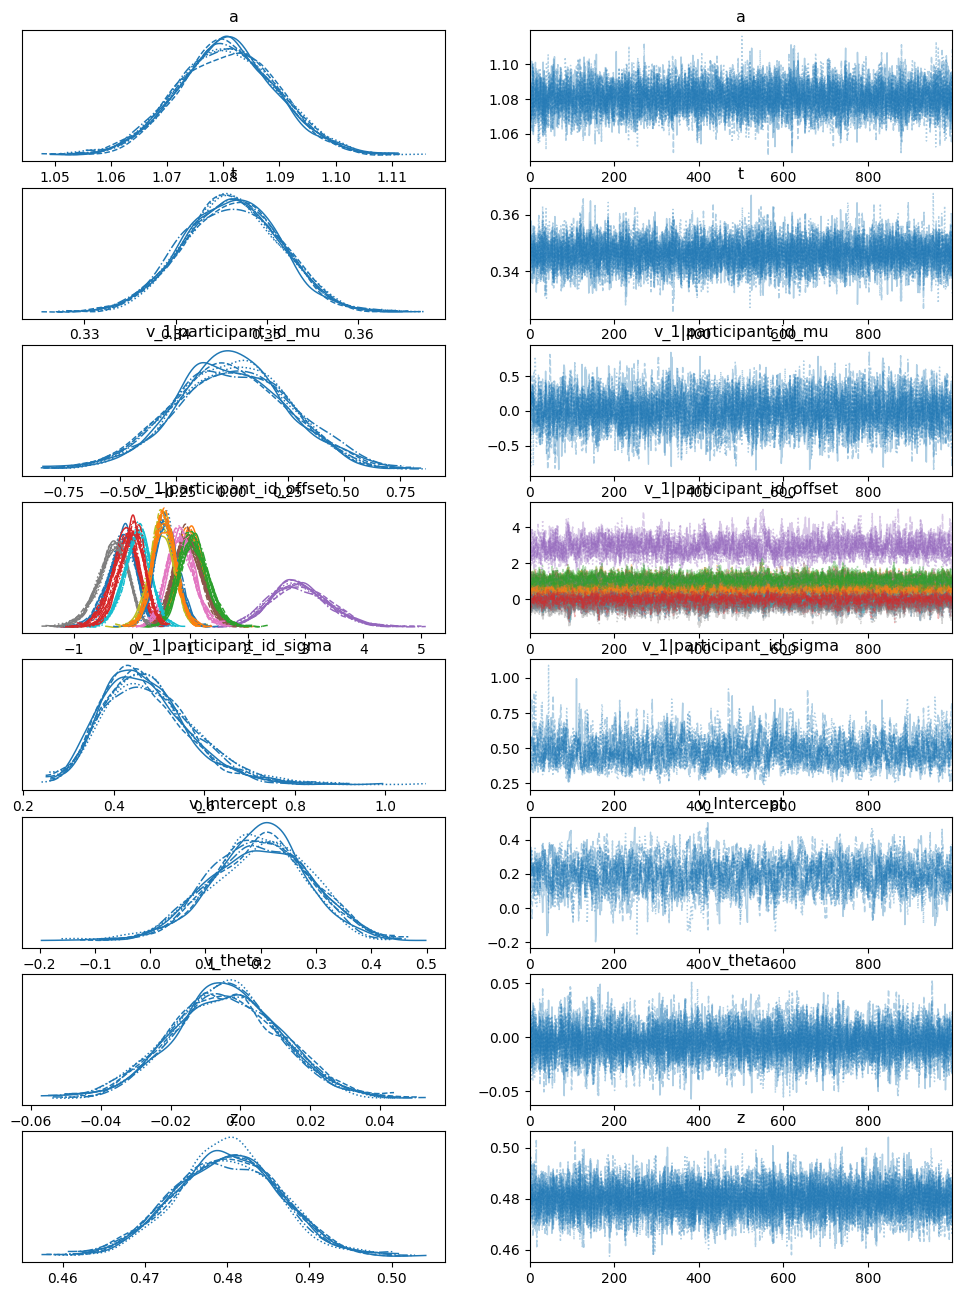

In [ ]:
az.plot_trace(idata)